# Why you must define `extent` when plotting an RA,Dec grid with matplotlib

When using:
 * matplotlib as the backend to afw.display and
 * astropy.wcs.WCS as the projection passed to matplotlib.pyplot.subplot

If you do not pass `extent` to matplotlib.pyplot.subplot, the grid will be correct only if the origin is (0,0).

Melissa Graham, Fri Apr 29, **data.lsst.cloud** and **DP0.1**, Weekly 2022_12

## Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas
pandas.set_option('display.max_rows', 1000)

import lsst.daf.butler as dafButler

import lsst.geom
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord

## Choose a deepCoadd image of a cluster that we are familiar with.

In [2]:
repo = 's3://butler-us-central1-dp01'
collection = '2.2i/runs/DP0.1'
butler = dafButler.Butler(repo, collections=collection)

In [3]:
my_spherePoint = lsst.geom.SpherePoint(55.745834*lsst.geom.degrees,
                                       -32.269167*lsst.geom.degrees)
skymap = butler.get('skyMap')
my_tract = skymap.findTract(my_spherePoint)
my_patch = my_tract.findPatch(my_spherePoint)
my_patch_id = my_tract.getSequentialPatchIndex(my_patch)
dataId = {'band': 'i', 'tract': 4431, 'patch': 17}

In [4]:
deepCoadd        = butler.get('deepCoadd_calexp', dataId=dataId)
deepCoadd_bbox   = butler.get('deepCoadd_calexp.bbox', dataId=dataId)
deepCoadd_wcs    = butler.get('deepCoadd_calexp.wcs', dataId=dataId)
deepCoadd_fitsMd = deepCoadd_wcs.getFitsMetadata()
deepCoadd_WCSfMd = WCS(deepCoadd_wcs.getFitsMetadata())

In [5]:
# print(deepCoadd_bbox)
# print(' ')
# print(deepCoadd_wcs)
# print(' ')
# print(deepCoadd_fitsMd)
# print(' ')
# print(deepCoadd_WCSfMd)

## Choose a calexp that we know should overlap with this deepCoadd

In [6]:
coadd_inputs = butler.get("deepCoadd_calexp.coaddInputs", dataId)
coadd_inputs_ccds_table = coadd_inputs.ccds.asAstropy()
use_detector = coadd_inputs_ccds_table['ccd'][0]
use_visit = coadd_inputs_ccds_table['visit'][0]
print(use_detector, use_visit)

138 177422


In [7]:
calexp        = butler.get('calexp', detector=use_detector, visit=use_visit)
calexp_bbox   = butler.get('calexp.bbox', detector=use_detector, visit=use_visit)
calexp_wcs    = butler.get('calexp.wcs', detector=use_detector, visit=use_visit)
calexp_fitsMd = calexp_wcs.getFitsMetadata()
calexp_WCSfMd = WCS(calexp_wcs.getFitsMetadata())

/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/obs_base/g7bd0041fb8+3c51939e74/python/lsst/obs/base/formatters/fitsExposure.py:639: UserWarning: Data ID {instrument: 'LSSTCam-imSim', detector: 138, visit: 177422} is missing (implied) value(s) for ['band', 'physical_filter']; the correctness of this Exposure's FilterLabel cannot be guaranteed. Call Registry.expandDataId before Butler.get to avoid this.
  warnings.warn(


In [8]:
# print(calexp_bbox)
# print(' ')
# print(calexp_wcs)
# print(' ')
# print(calexp_fitsMd)
# print(' ')
# print(calexp_WCSfMd)

## Get the corners and show calexp overlaps deepCoadd

corners go clockwise from lower left:
lower left, upper left, upper right, lower right

In [9]:
### deepCoadd's corners
dc_crnrs = [ deepCoadd_wcs.pixelToSky(deepCoadd_bbox.beginX, deepCoadd_bbox.beginY), 
             deepCoadd_wcs.pixelToSky(deepCoadd_bbox.beginX, deepCoadd_bbox.endY), 
             deepCoadd_wcs.pixelToSky(deepCoadd_bbox.endX, deepCoadd_bbox.endY), 
             deepCoadd_wcs.pixelToSky(deepCoadd_bbox.endX, deepCoadd_bbox.beginY) ]

print('deepCoadd corners:')
dc_crnrs_deg = np.zeros((4,2), dtype = 'float')
for i in range(4):
    dc_crnrs_deg[i,0] = dc_crnrs[i].getRa().asDegrees()
    dc_crnrs_deg[i,1] = dc_crnrs[i].getDec().asDegrees()
    coord = SkyCoord(ra = dc_crnrs[i].getRa().asDegrees()*u.degree, 
                     dec = dc_crnrs[i].getDec().asDegrees()*u.degree)
    ra = str(coord.to_string('hmsdms')).split()[0]
    dec = str(coord.to_string('hmsdms')).split()[1]
    print('%1i %9.5f %9.5f %10ss %11ss' % (i, dc_crnrs_deg[i,0], dc_crnrs_deg[i,1], ra[0:10], dec[0:11]))

ca_crnrs = [ calexp_wcs.pixelToSky(calexp_bbox.beginX, calexp_bbox.beginY), 
             calexp_wcs.pixelToSky(calexp_bbox.beginX, calexp_bbox.endY), 
             calexp_wcs.pixelToSky(calexp_bbox.endX, calexp_bbox.endY), 
             calexp_wcs.pixelToSky(calexp_bbox.endX, calexp_bbox.beginY) ]

### calexp's corners
print('calexp corners:')
ca_crnrs_deg = np.zeros((4,2), dtype = 'float')
for i in range(4):
    ca_crnrs_deg[i,0] = ca_crnrs[i].getRa().asDegrees()
    ca_crnrs_deg[i,1] = ca_crnrs[i].getDec().asDegrees()
    coord = SkyCoord(ra = ca_crnrs[i].getRa().asDegrees()*u.degree, 
                     dec = ca_crnrs[i].getDec().asDegrees()*u.degree)
    ra = str(coord.to_string('hmsdms')).split()[0]
    dec = str(coord.to_string('hmsdms')).split()[1]
    print('%1i %9.5f %9.5f %10ss %11ss' % (i, ca_crnrs_deg[i,0], ca_crnrs_deg[i,1], ra[0:10], dec[0:11]))


deepCoadd corners:
0  55.79016 -32.32223 03h43m09.6s -32d19m20.0s
1  55.78981 -32.08890 03h43m09.5s -32d05m20.0s
2  55.51440 -32.08890 03h42m03.4s -32d05m20.0s
3  55.51405 -32.32223 03h42m03.3s -32d19m20.0s
calexp corners:
0  55.98033 -32.38503 03h43m55.2s -32d23m06.1s
1  55.85948 -32.18774 03h43m26.2s -32d11m15.8s
2  55.62172 -32.29137 03h42m29.2s -32d17m28.9s
3  55.74216 -32.48891 03h42m58.1s -32d29m20.0s


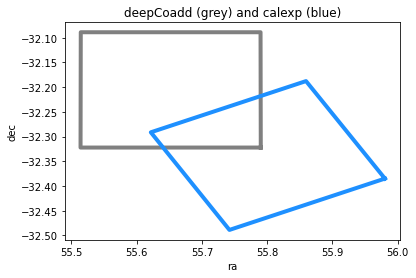

In [10]:
fig = plt.figure(figsize=(6,4))

plt.plot( [dc_crnrs_deg[0][0], dc_crnrs_deg[1][0], dc_crnrs_deg[2][0], dc_crnrs_deg[3][0], dc_crnrs_deg[0][0]], 
          [dc_crnrs_deg[0][1], dc_crnrs_deg[1][1], dc_crnrs_deg[2][1], dc_crnrs_deg[3][1], dc_crnrs_deg[0][1]],
          ls='solid', lw=4, alpha=1, color='grey' )
plt.plot( [ca_crnrs_deg[0][0], ca_crnrs_deg[1][0], ca_crnrs_deg[2][0], ca_crnrs_deg[3][0], ca_crnrs_deg[0][0]], 
          [ca_crnrs_deg[0][1], ca_crnrs_deg[1][1], ca_crnrs_deg[2][1], ca_crnrs_deg[3][1], ca_crnrs_deg[0][1]],
          ls='solid', lw=4, alpha=1, color='dodgerblue' )

plt.xlabel( 'ra' )
plt.ylabel( 'dec' )
plt.title( 'deepCoadd (grey) and calexp (blue)' )
plt.show()

## Don't define `extent` and realize that the RA,Dec grid is incorrect for the deepCoadd

Compare overlayed grid lines to the corners, which are listed below.
 * --> they do not match for the deepCoadd, but they do for the calexp

Compare the coordinates of a source at about 3h42m58s -32d18m27s.
 * --> the results of pixelToSky are incorrect for the deepCoadd, correct for the calexp

deepCoadd yellow circle:  03h46m06.8364582s -32d44m35.15780912s
calexp pink circle:  03h42m58.00998671s -32d18m26.13924921s


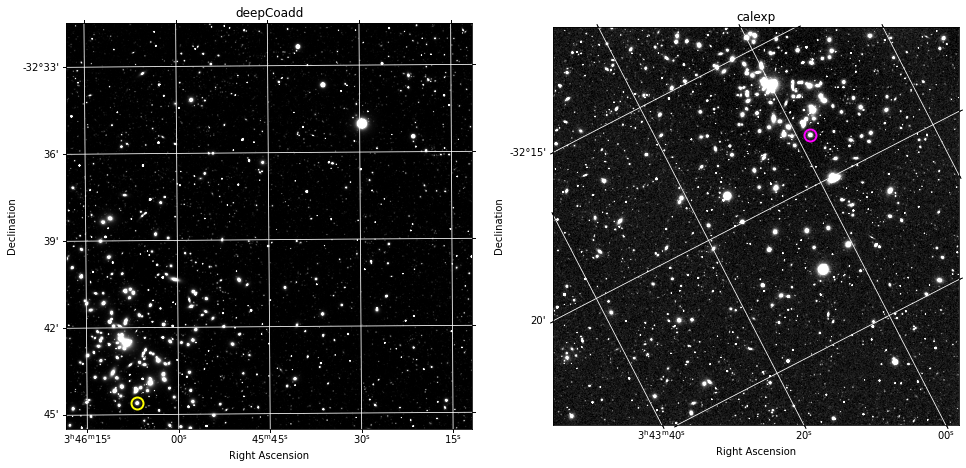

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharex=False, sharey=False)

### deepCoadd
plt.subplot(1, 2, 1, projection=deepCoadd_WCSfMd)
plt.imshow(deepCoadd.image.array, cmap='gray', vmin=0, vmax=2, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('deepCoadd')

### yellow circle
test_pix_x = 730
test_pix_y = 270
plt.plot( test_pix_x, test_pix_y, 'o', ms=12, color='None', mew=2, mec='yellow' )
coord_sph = deepCoadd_wcs.pixelToSky(test_pix_x, test_pix_y)
coord = SkyCoord(ra = coord_sph.getRa().asDegrees()*u.degree, 
                     dec = coord_sph.getDec().asDegrees()*u.degree)
print('deepCoadd yellow circle: ',coord.to_string('hmsdms'))

### calexp
plt.subplot(1, 2, 2,  projection=calexp_WCSfMd)
plt.imshow(calexp.image.array, cmap='gray', vmin=-10, vmax=100, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('calexp')

### magenta circle
test_pix_x = 2580
test_pix_y = 2910
plt.plot( test_pix_x, test_pix_y, 'o', ms=12, color='None', mew=2, mec='magenta' )
coord_sph = calexp_wcs.pixelToSky(test_pix_x, test_pix_y)
coord = SkyCoord(ra = coord_sph.getRa().asDegrees()*u.degree, 
                     dec = coord_sph.getDec().asDegrees()*u.degree)
print('calexp pink circle: ',coord.to_string('hmsdms'))

plt.show()

|deepCoadd corners:      |            |calexp corners:         |
|------------------------|------------|------------------------|
|03h43m09.6s -32d19m20.0s|            |03h43m55.2s -32d23m06.1s|
|03h43m09.5s -32d05m20.0s|            |03h43m26.2s -32d11m15.8s|
|03h42m03.4s -32d05m20.0s|            |03h42m29.2s -32d17m28.9s|
|03h42m03.3s -32d19m20.0s|            |03h42m58.1s -32d29m20.0s|

## Do define `extent` and live happily ever after

Except that it takes way longer to make the plot.

deepCoadd yellow circle:  03h42m58.11800281s -32d18m26.16854475s
calexp pink circle:  03h42m58.00998671s -32d18m26.13924921s


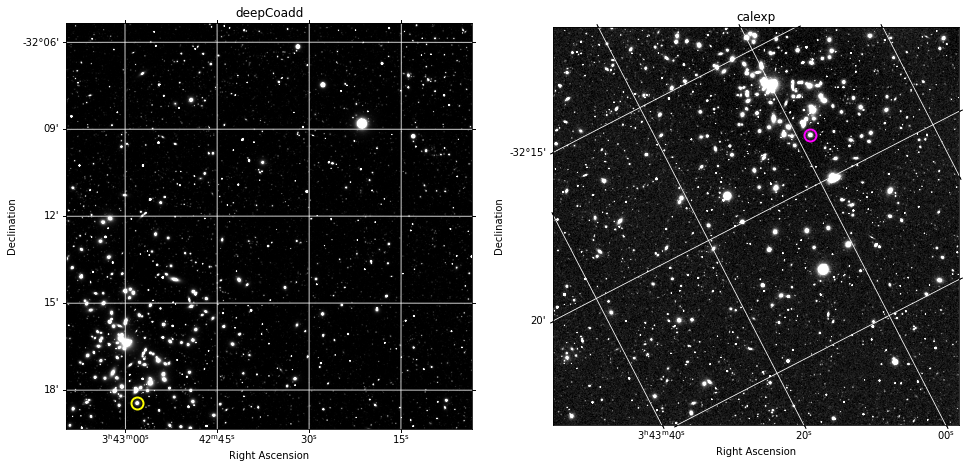

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharex=False, sharey=False)

plt.subplot(1, 2, 1, projection=deepCoadd_WCSfMd)
deepCoadd_extent = (deepCoadd_bbox.beginX, deepCoadd_bbox.endX, deepCoadd_bbox.beginY, deepCoadd_bbox.endY )
plt.imshow(deepCoadd.image.array, cmap='gray', vmin=0, vmax=2, extent=deepCoadd_extent, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('deepCoadd')

test_pix_x = 730+deepCoadd_bbox.beginX
test_pix_y = 270+deepCoadd_bbox.beginY
plt.plot( test_pix_x, test_pix_y, 'o', ms=12, color='None', mew=2, mec='yellow' )
coord_sph = deepCoadd_wcs.pixelToSky(test_pix_x, test_pix_y)
coord = SkyCoord(ra = coord_sph.getRa().asDegrees()*u.degree, 
                     dec = coord_sph.getDec().asDegrees()*u.degree)
print('deepCoadd yellow circle: ',coord.to_string('hmsdms'))

plt.subplot(1, 2, 2,  projection=calexp_WCSfMd)
calexp_extent = (calexp_bbox.beginX, calexp_bbox.endX, calexp_bbox.beginY, calexp_bbox.endY )
plt.imshow(calexp.image.array, cmap='gray', vmin=-10, vmax=100, extent=calexp_extent, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('calexp')

test_pix_x = 2580
test_pix_y = 2910
plt.plot( test_pix_x, test_pix_y, 'o', ms=12, color='None', mew=2, mec='magenta' )
coord_sph = calexp_wcs.pixelToSky(test_pix_x, test_pix_y)
coord = SkyCoord(ra = coord_sph.getRa().asDegrees()*u.degree, 
                     dec = coord_sph.getDec().asDegrees()*u.degree)
print('calexp pink circle: ',coord.to_string('hmsdms'))

plt.show()

|deepCoadd corners:      |            |calexp corners:         |
|------------------------|------------|------------------------|
|03h43m09.6s -32d19m20.0s|            |03h43m55.2s -32d23m06.1s|
|03h43m09.5s -32d05m20.0s|            |03h43m26.2s -32d11m15.8s|
|03h42m03.4s -32d05m20.0s|            |03h42m29.2s -32d17m28.9s|
|03h42m03.3s -32d19m20.0s|            |03h42m58.1s -32d29m20.0s|

## firefly

The deepCoadd RA,Dec are correct when we use firefly.

In [13]:
# afwDisplay.setDefaultBackend('firefly')
# afw_display = afwDisplay.Display(frame=1)

In [14]:
# afw_display.mtv(calexp)

In [15]:
# afw_display.mtv(deepCoadd)